In [58]:
# Problem Statement
#1. Analyze when will most of the flights take-off
#2. Does Duration impact price?
#3. Which route is Jet Airways most used
#4. Airline vs Price Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_data = pd.read_excel("/Users/ellakennedy/Library/CloudStorage/OneDrive-UniversityofWaterloo/Personal Projects/Untitled Folder/Flight_Price_resources/Data_Train.xlsx")

In [7]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# Check null values

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
# Remove Null Values

In [15]:
train_data.dropna(inplace=True)

In [ ]:
# Checking all null values have been removed

In [16]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [17]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
# Making a copy of the dataset

In [18]:
data=train_data.copy()

In [19]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [20]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
# Changing Data Types

In [36]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [31]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [38]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:change_into_Datetime(feature)

In [39]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
# Creating specifics day/month/year columns for Departure Date

In [43]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [44]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [45]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [46]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-15 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-15 05:50:00,2023-10-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [ ]:
# Extract Arrival + Departure Hour & minute

In [51]:
def extract_hour_min(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col+ "_minute"]= df[col].dt.minute
    return df.head(2)

In [52]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-15 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-15 05:50:00,2023-10-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [53]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-15 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-15 05:50:00,2023-10-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [ ]:
# Preprocessing on Duration Column

In [81]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' 0m'
    return x
    

In [82]:
data['Duration'] = data["Duration"].apply(preprocess_duration)

In [84]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [87]:
data["Duration_hour"] = data["Duration"].apply(lambda x : int(x.split(" ")[0][0:-1]))

In [89]:
data["Duration_mins"] = data["Duration"].apply(lambda x : int(x.split(" ")[1][0:-1]))

In [91]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [ ]:
# Removing Departure Time + Arrival Time Columns (Redundant)

In [55]:
cols_to_drop = ["Arrival_Time", "Dep_Time"]
data.drop(cols_to_drop, axis =1, inplace=True)

In [56]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [57]:
##1 When will most flights take off?

(10682, 16)

In [60]:
def flight_dep_time(x):
    
    if(x>4) and (x<=8):
        return "Early Morning"
    
    elif(x>8) and (x<=12):
        return "Morning"
    
    elif(x>12) and (x<=16):
        return "Afternonn"
    
    elif(x>16) and (x<=20):
        return "Evening"
    
    if(x>20) and (x<=24):
        return "Night"
    
    else:
        return "Late night"
    

In [76]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs 
init_notebook_mode(connected=True)
cf.go_offline()

In [78]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind = "bar", color ="blue")

In [ ]:
#Most flight take off early morning between 4am and 8am.

In [ ]:
##2. Does Duration impact price?

In [94]:
data['Duration_total_mins'] = data['Duration'].str.replace('h', '*60').str.replace(" ", "+").str.replace('m',"*1").apply(eval)

In [95]:
data['Duration_total_mins'].head(3)

0     170
1     445
2    1140
Name: Duration_total_mins, dtype: int64

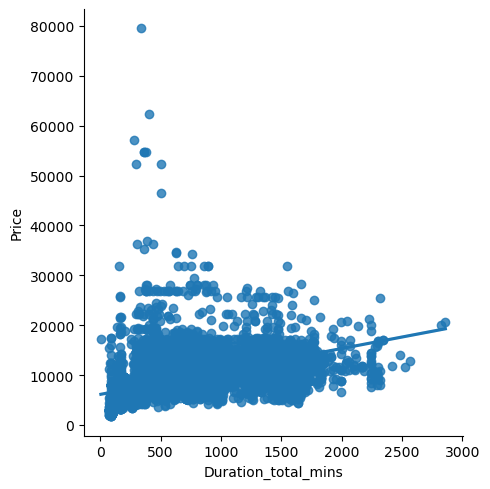

In [104]:
sns.lmplot(x="Duration_total_mins", y="Price", data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

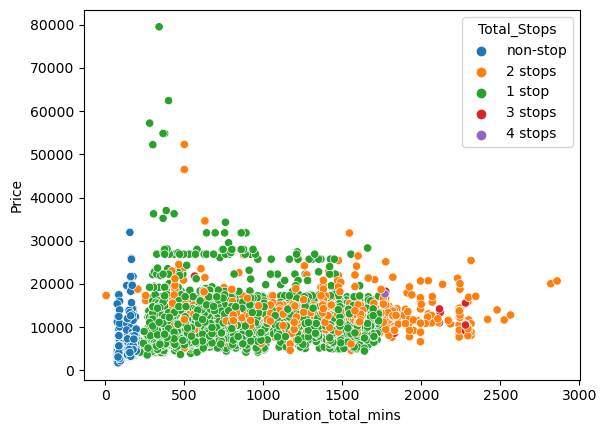

In [99]:
sns.scatterplot(x="Duration_total_mins", y="Price", hue="Total_Stops", data=data)

In [ ]:
# Based off the two plots as duration & number of stops increases the price will also increase

In [ ]:
##3. On which route is Jet Airways most used?

In [ ]:
# These are the top 5 routes that Jet Airways operates

In [113]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending= False).head(5)

Route
CCU → BOM → BLR    930
DEL → BOM → COK    875
BLR → BOM → DEL    385
BLR → DEL          382
CCU → DEL → BLR    300
dtype: int64

In [ ]:
##4. Airline Vs Price Analysis 

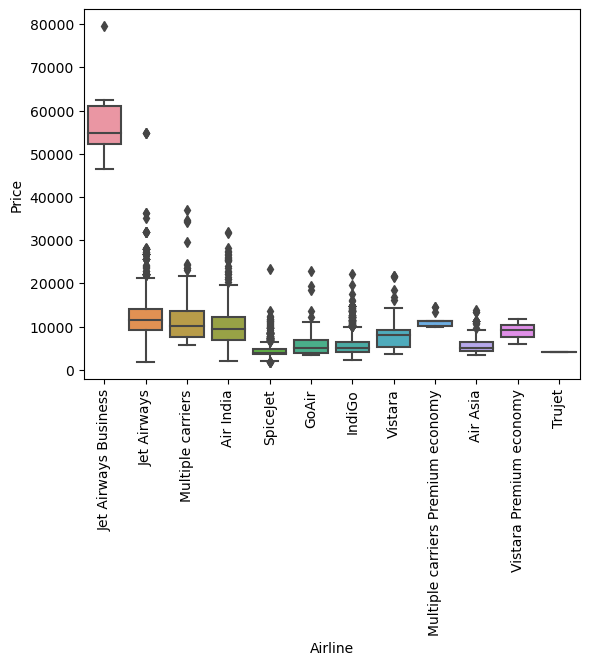

In [119]:
sns.boxplot(y = 'Price', x='Airline', data=data.sort_values('Price', ascending = False))
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
# Jet Airways is the most expensive airline overall.